In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import hyperspy

In [2]:
import matplotlib
matplotlib.rcParams["backend"] = "Qt4Agg"

In [3]:
from traits.etsconfig.api import ETSConfig
ETSConfig.toolkit = 'qt4'
%matplotlib notebook
import hyperspy.api as hs

/opt/anaconda3/envs/hsenv2/lib/python3.7/site-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


In [21]:
specimen = 3
if specimen == 3:
    ZLPs = np.load("ZLPs_13_sp3.npy")
    data_14 = np.load("sample_data_13_sp3.npy")
else:
    data_14 = np.load("sample_data_14.npy")
    ZLPs = np.load("ZLPs_14.npy")

In [22]:
data_14.shape

(2000, 2)

In [23]:
s = hs.signals.Signal1D(data_14[:,1])
energy_data = data_14[:,0]
s.axes_manager[0].scale = np.diff(energy_data).mean()
s.axes_manager[0].units = 'keV'
s.axes_manager[0].offset = energy_data[0]
s.axes_manager[0].name = 'Energy'
s.axes_manager

Signal axis name,size,offset,scale,units
Energy,2000,-0.9304652326163081,0.0050025012506253125,keV


In [24]:
ZLP_avg = np.average(ZLPs, axis = 0)
N_ZLP = np.sum(ZLP_avg)

In [29]:
s.set_signal_type('EELS')
s.set_microscope_parameters(beam_energy=200, collection_angle=30)
eps, out = s.kramers_kronig_analysis(zlp = N_ZLP, n = 3, full_output = True)#, iterations = 2)

thickness:  [12.03908483] nm


<IPython.core.display.Javascript object>


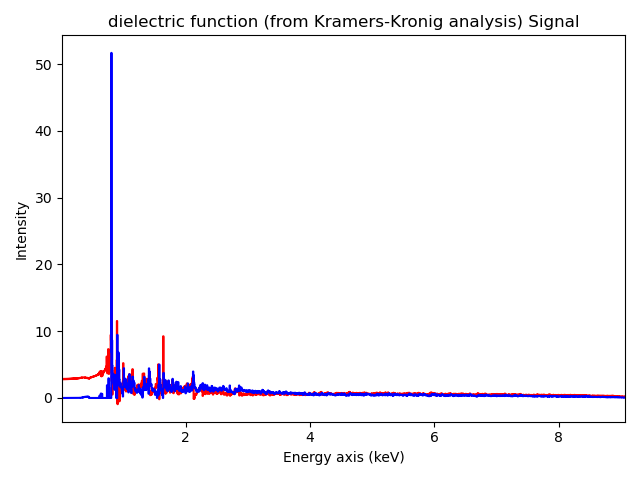

In [30]:
print('thickness: ', out['thickness'].data, 'nm')
eps.plot()

thickness:  [16.87121759] nm


<IPython.core.display.Javascript object>


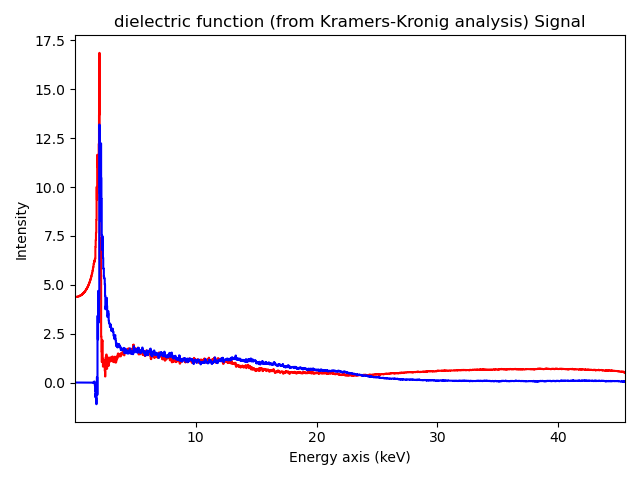

In [31]:
specimen = 4
if specimen == 3:
    ZLPs = np.load("ZLPs_13_sp3.npy")
    data_14 = np.load("sample_data_13_sp3.npy")
else:
    data_14 = np.load("sample_data_14.npy")
    ZLPs = np.load("ZLPs_14.npy")
s = hs.signals.Signal1D(data_14[:,1])
energy_data = data_14[:,0]
s.axes_manager[0].scale = np.diff(energy_data).mean()
s.axes_manager[0].units = 'keV'
s.axes_manager[0].offset = energy_data[0]
s.axes_manager[0].name = 'Energy'
s.axes_manager
ZLP_avg = np.average(ZLPs, axis = 0)
N_ZLP = np.sum(ZLP_avg)
s.set_signal_type('EELS')
s.set_microscope_parameters(beam_energy=200, collection_angle=30)
eps, out = s.kramers_kronig_analysis(zlp = N_ZLP, n = 3, full_output = True)#, iterations = 2)
print('thickness: ', out['thickness'].data, 'nm')
eps.plot()

In [34]:
np.real(eps.data)

array([4.37901791, 4.37829201, 4.37999728, ..., 0.50591284, 0.50674489,
       0.48617055])

In [36]:
np.save("hs_og_eps_14",eps.data)

In [47]:
axis = s.axes_manager.signal_axes[0]
l = axis.size

In [48]:
slicer = s.axes_manager._get_data_slice(
            [(axis.index_in_array, slice(None, axis.size)), ])

In [49]:
import scipy
esize = scipy.fftpack.next_fast_len(2*l)